In [1]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt


def base(M, n):
    # calculate the image of the base under a matrix M
    # M: Binary matrix
    # n: number of pairs

    # make a set of all combinations of the first column and the last n columns (these correspond to X_1, Z_1,...,Z_n)
    s = []
    for i in range(n+1, 2*n):
        s.append(M[0:2*n, i])
    powerset = it.chain.from_iterable(it.combinations(s, r) for r in range(1, len(s)+1))
    
    res = [vector(GF(2),2*n)]
        
    for i in powerset:
        v = vector(sum(i))     # calculate the sum of the elements of each combination (e.g IZZ = IZI + IIZ)
        res.append(v)
        
    return res


def pillars(M, n):
    # calculate the image of the pillars under a matrix M
    # M: Binary matrix
    # n: number of pairs
    X1 = vector(M[0:2*n, 0])
    Z1 = vector(M[0:2*n, n])
    Y1 = X1 + Z1
    
    pI = base(M, n)
    pX = [(X1 + b) for b in pI]
    pY = [(Y1 + b) for b in pI]
    pZ = [(Z1 + b) for b in pI]
    
    return [pI, pX, pY, pZ]   

def generate_pauli_dict_2(p_I, p_X, p_Y, p_Z):

    # Given a Pauli vector return a dictionary in the format of {"XX": p_X*p_X, ...}. This is a representation of a state \rho \otimes \rho.

    paulis = ["I", "X", "Y", "Z"]
    result = {}
    for p1 in paulis:
        for p2 in paulis:
            value = 1
            if p1 == "I":
                value *= p_I
            if p1 == "X":
                value *= p_X
            if p1 == "Y":
                value *= p_Y
            if p1 == "Z":
                value *= p_Z
            if p2 == "I":
                value *= p_I
            if p2 == "X":
                value *= p_X
            if p2 == "Y":
                value *= p_Y
            if p2 == "Z":
                value *= p_Z
            result[p1+p2] = value      
    return result  


def generate_pauli_dict_3(p_I, p_X, p_Y, p_Z):

    # Given a Pauli vector return a dictionary in the format of {"XXX": p_X*p_X*p_X, ...}. This is a representation of a state \rho \otimes \rho \otimes \rho.

    paulis = ["I", "X", "Y", "Z"]
    result = {}
    for p1 in paulis:
        for p2 in paulis:
            for p3 in paulis:
                value = 1
                if p1 == "I":
                    value *= p_I
                if p1 == "X":
                    value *= p_X
                if p1 == "Y":
                    value *= p_Y
                if p1 == "Z":
                    value *= p_Z
                if p2 == "I":
                    value *= p_I
                if p2 == "X":
                    value *= p_X
                if p2 == "Y":
                    value *= p_Y
                if p2 == "Z":
                    value *= p_Z
                if p3 == "X":
                    value *= p_X
                if p3 == "Y":
                    value *= p_Y
                if p3 == "Z":
                    value *= p_Z
                result[p1+p2+p3] = value      
    return result  


def bin_to_pauli(input):
    # Convert a binary string to correspond Pauli operator, also in string type.
    if input == "00":
        return "I"
    elif input == "10":
        return "X"
    elif input == "01":
        return "Z"
    elif input == "11":
        return "Y"
    
def translate_pauli_3(pillars):
    # Given the pillars, get the corresponding Pauli elements in string format.
    # In the case of 2 pairs, for example, if DEJMPS matrix is given, this returns [["II", "YY"], ["XX", "ZZ"], ["ZX", "XZ"], ["YI", "IY"]]
    pilI = []
    pilX = []
    pilY = []
    pilZ = []

    #Case: pilI
    pilI.append(bin_to_pauli(str(pillars[0][0][0]) + str(pillars[0][0][3])) + bin_to_pauli(str(pillars[0][0][1]) + str(pillars[0][0][4])) + bin_to_pauli(str(pillars[0][0][2]) + str(pillars[0][0][5]))) 
    pilI.append(bin_to_pauli(str(pillars[0][1][0]) + str(pillars[0][1][3])) + bin_to_pauli(str(pillars[0][1][1]) + str(pillars[0][1][4])) + bin_to_pauli(str(pillars[0][1][2]) + str(pillars[0][1][5]))) 

    #Case: pilX
    
    pilX.append(bin_to_pauli(str(pillars[1][0][0]) + str(pillars[1][0][3])) + bin_to_pauli(str(pillars[1][0][1]) + str(pillars[1][0][4])) + bin_to_pauli(str(pillars[1][0][2]) + str(pillars[1][0][5]))) 
    pilX.append(bin_to_pauli(str(pillars[1][1][0]) + str(pillars[1][1][3])) + bin_to_pauli(str(pillars[1][1][1]) + str(pillars[1][1][4])) + bin_to_pauli(str(pillars[1][1][2]) + str(pillars[1][1][5]))) 

    #Case: pilY
    pilY.append(bin_to_pauli(str(pillars[2][0][0]) + str(pillars[2][0][3])) + bin_to_pauli(str(pillars[2][0][1]) + str(pillars[2][0][4])) + bin_to_pauli(str(pillars[2][0][2]) + str(pillars[2][0][5]))) 
    pilY.append(bin_to_pauli(str(pillars[2][1][0]) + str(pillars[2][1][3])) + bin_to_pauli(str(pillars[2][1][1]) + str(pillars[2][1][4])) + bin_to_pauli(str(pillars[2][1][2]) + str(pillars[2][1][5]))) 

    #Case: pilZ
    pilZ.append(bin_to_pauli(str(pillars[3][0][0]) + str(pillars[3][0][3])) + bin_to_pauli(str(pillars[3][0][1]) + str(pillars[3][0][4])) + bin_to_pauli(str(pillars[3][0][2]) + str(pillars[3][0][5]))) 
    pilZ.append(bin_to_pauli(str(pillars[3][1][0]) + str(pillars[3][1][3])) + bin_to_pauli(str(pillars[3][1][1]) + str(pillars[3][1][4])) + bin_to_pauli(str(pillars[3][1][2]) + str(pillars[3][1][5]))) 
    
    return [pilI, pilX, pilY, pilZ]


def sum_up_dict(pauli_dict, lst_pauli_str):
    # Given a Pauli dictionary {"XX": ..., "XY": ..., ...} and a list of Pauli string ["XX", "YY", ...]
    # return the sum of corresponding values.
    result = 0
    for p in lst_pauli_str:
        result += pauli_dict[p]
    return result

def get_components_psuc_3(input_vector, M, N):
    # Given an input Pauli vector, and a clifford operator. Get Pauli vector after distillation circuit M.
    pauli_dict = generate_pauli_dict_3(input_vector[0], input_vector[1], input_vector[2], input_vector[3])
    pil_str = translate_pauli_3(pillars(M, N)) 
    p_I = sum_up_dict(pauli_dict, pil_str[0]) / sum_up_dict(pauli_dict, list(it.chain.from_iterable(pil_str))) 
    p_X = sum_up_dict(pauli_dict, pil_str[1]) / sum_up_dict(pauli_dict, list(it.chain.from_iterable(pil_str))) 
    p_Y = sum_up_dict(pauli_dict, pil_str[2]) / sum_up_dict(pauli_dict, list(it.chain.from_iterable(pil_str))) 
    p_Z = sum_up_dict(pauli_dict, pil_str[3]) / sum_up_dict(pauli_dict, list(it.chain.from_iterable(pil_str))) 
    
    #list(it.chain.from_iterable...) is the p_suc
    p_suc = sum_up_dict(pauli_dict, list(it.chain.from_iterable(pil_str)))
    return [p_I, p_X, p_Y, p_Z], p_suc

def get_werner(fidelity):
    # Generate Werner state in Pauli vector form.
    return [fidelity, (1-fidelity) / 3, (1-fidelity) / 3, (1-fidelity) / 3]

def permute_paulies(p_vector):
    # Dumb way to generate all permutations of the p_X, p_Y, p_Z
    P_1 = [p_vector[0], p_vector[1], p_vector[2], p_vector[3]]
    P_2 = [p_vector[0], p_vector[1], p_vector[3], p_vector[2]]
    P_3 = [p_vector[0], p_vector[2], p_vector[1], p_vector[3]]
    P_4 = [p_vector[0], p_vector[2], p_vector[3], p_vector[1]]
    P_5 = [p_vector[0], p_vector[3], p_vector[1], p_vector[2]]
    P_6 = [p_vector[0], p_vector[2], p_vector[3], p_vector[1]]

    return [P_1, P_2, P_3, P_4, P_5, P_6]

def bin_entropy(p):
    # Binary entropy function
    if p == 0 or p == 1:
        return 0
    else:
        return (-p* np.log2(p)) - (1-p) * np.log2(1-p)
def get_bb84_rate(p_vector, p_suc):
    # Calculate BB84 key rates
    error_bitfilip = p_vector[1] + p_vector[2]
    error_phaseflip= p_vector[2] + p_vector[3]
    # Prefactor is 1/ # total pair used.
    prefactor = 1/9
    r_sk = (1 - bin_entropy(error_bitfilip) - bin_entropy(error_phaseflip)) * p_suc * prefactor

    if r_sk < 0 :
        return 0 

    return r_sk

In [3]:
input_fid_list = np.linspace(0.25, 1, 100)
num_ED = 315
num_local_pauli = 6
num_CNOT = 168


output_fids = np.zeros((len(input_fid_list), num_ED, num_local_pauli, num_CNOT))
output_keyrates = np.zeros((len(input_fid_list), num_ED, num_local_pauli, num_CNOT))
output_p_suc = np.zeros((len(input_fid_list), num_ED, num_local_pauli, num_CNOT))

# For each fidelity
for idx_fidelity in range(len(input_fid_list)):
    werner_state = get_werner(input_fid_list[idx_fidelity])
    print(idx_fidelity)
    for idx_ED in range(num_ED):
        for idx_local_pauli in range(num_local_pauli):
            for idx_CNOT in range(num_CNOT):
                
                # ED stage
                M_ED = load(f'ED_transversal/3_pair/ED3_{idx_ED}.sobj').inverse()
                state_ED, p_suc_1 = get_components_psuc_3(werner_state, M_ED, 3)
                
                # Permutation stage
                state_permute = permute_paulies(state_ED)[idx_local_pauli]

                # AD stage
                M_CNOT = load(f'CNOT_subgroup/3_pair/cnots_{idx_CNOT}.sobj').inverse()

                state_cnot, p_suc_2 = get_components_psuc_3(state_permute, M_CNOT, 3)
                
                
                p_suc = p_suc_1 * p_suc_2
                output_fids[idx_fidelity, idx_ED, idx_local_pauli, idx_CNOT] = state_cnot[0]
                output_p_suc[idx_fidelity, idx_ED, idx_local_pauli, idx_CNOT] = p_suc
                output_keyrates[idx_fidelity, idx_ED, idx_local_pauli, idx_CNOT] = get_bb84_rate(state_cnot, p_suc)

np.save("output_fids_33", output_fids)
np.save("output_p_suc_33", output_p_suc)
np.save("output_keyrates_33", output_keyrates)
print("Enumeration complete!")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Enumeration complete!


In [4]:
achievable_fids = []
for idx_fidelity in range(len(input_fid_list)):
    achievable_fids.append(np.max(output_fids[idx_fidelity]))

achievable_keyrates = []
for idx_fidelity in range(len(input_fid_list)):
    achievable_keyrates.append(np.max(output_keyrates[idx_fidelity]))

Text(0.5, 1.0, 'Achievable Keyrate (BB84)')

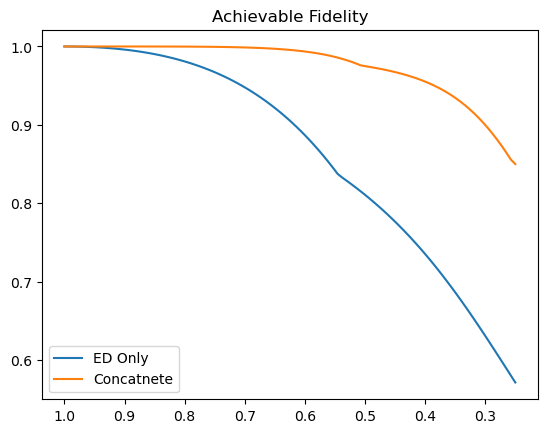

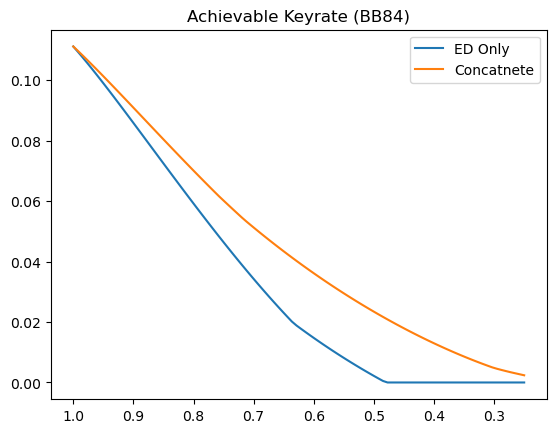

In [5]:
plt.plot(input_fid_list, achievable_fids_ED_only, label = "ED Only")
plt.plot(input_fid_list, achievable_fids, label = "Concatnete")
plt.legend(loc='best')
plt.gca().invert_xaxis()
plt.title("Achievable Fidelity")

plt.figure()
plt.plot(input_fid_list, achievable_keyrates_ED_only, label = "ED Only")
plt.plot(input_fid_list, achievable_keyrates, label = "Concatnete")
plt.legend(loc='best')
plt.gca().invert_xaxis()
plt.title("Achievable Keyrate (BB84)")

In [6]:
achievable_keyrates_ED_only[0]

0.0

In [7]:
output_p_suc

array([[[[0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938],
         [0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938],
         [0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938],
         [0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938],
         [0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938],
         [0.15625   , 0.15625   , 0.09765625, ..., 0.09765625,
          0.06835938, 0.06835938]],

        [[0.109375  , 0.109375  , 0.08258929, ..., 0.08258929,
          0.05317283, 0.05747768],
         [0.109375  , 0.109375  , 0.08258929, ..., 0.08258929,
          0.05317283, 0.05747768],
         [0.109375  , 0.109375  , 0.0625    , ..., 0.0625    ,
          0.04815051, 0.05747768],
         [0.15625   , 0.15625   , 0.10602679, ..., 0.10602679,
          0.08211097, 0.07828444],
         [0.109375